In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_deaths.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)  # visualization tool


from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import IFrame
IFrame('https://www.myheatmap.com/maps/PPk1_rfT1jQ%3D', width=800, height=600)

<br><h2>**What is Coronavirus</h2>**</br>
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

<br><h2>**Define the Problem**</h2></br>
Coronaviruses are a large family of viruses that are common in many different species of animals, including camels, cattle, cats, and bats. Rarely, animal coronaviruses can infect people and then spread between people such as with MERS, SARS, and now with 2019-nCoV.

Outbreaks of novel virus infections among people are always of public health concern. The risk from these outbreaks depends on characteristics of the virus, including whether and how well it spreads between people, the severity of resulting illness, and the medical or other measures available to control the impact of the virus (for example, vaccine or treatment medications).

This is a very serious public health threat. The fact that this virus has caused severe illness and sustained person-to-person spread in China is concerning, but it’s unclear how the situation in the United States will unfold at this time.

The risk to individuals is dependent on exposure. At this time, some people will have an increased risk of infection, for example healthcare workers caring for 2019-nCoV patients and other close contacts. For the general American public, who are unlikely to be exposed to this virus, the immediate health risk from 2019-nCoV is considered low. The goal of the ongoing U.S. public health response is to prevent sustained spread of 2019-nCov in this country.

<br><h2>**Precautions**</h2></br>
Health authorities and scientists say the same precautions against other viral illnesses can be used: wash your hands frequently, cover up your coughs, try not to touch your face.
And anyone who does come down with the virus should be placed in isolation.
"Considering that substantial numbers of patients with SARS and MERS were infected in health-care settings", precautions need to be taken to prevent that happening again, the Chinese team warned in The Lancet.

<h1>If you like my work Kindly **upvote** the kernel!!</h1>

In [4]:
data= pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

In [5]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 8 columns):
Sno               1127 non-null int64
Date              1127 non-null object
Province/State    837 non-null object
Country           1127 non-null object
Last Update       1127 non-null object
Confirmed         1127 non-null float64
Deaths            1127 non-null float64
Recovered         1127 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 70.6+ KB


In [7]:
data.shape

(1127, 8)

In [8]:
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1127.000000,1127.000000,1127.000000,1127.000000
mean,564.000000,255.912156,5.443656,12.046140
std,325.481182,1796.841832,52.486877,83.674768
min,1.000000,0.000000,0.000000,0.000000
25%,282.500000,2.000000,0.000000,0.000000
50%,564.000000,10.000000,0.000000,0.000000
75%,845.500000,80.000000,0.000000,2.000000
max,1127.000000,29631.000000,871.000000,1795.000000


In [9]:
data.isnull().sum()

Sno                 0
Date                0
Province/State    290
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [10]:
#this shows we have empty values in province/state field

In [11]:
data[['Confirmed', 'Deaths', 'Recovered']].sum()

Confirmed    288413.0
Deaths         6135.0
Recovered     13576.0
dtype: float64

In [12]:
# Let's get rid of the Sno column as it's redundant
data.drop(['Sno'], axis=1, inplace=True)

In [13]:
data.drop('Last Update', axis=1, inplace=True)

In [14]:
data.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1122,02/09/2020 23:20:00,"Los Angeles, CA",US,1.0,0.0,0.0
1123,02/09/2020 23:20:00,"Madison, WI",US,1.0,0.0,0.0
1124,02/09/2020 23:20:00,"Orange, CA",US,1.0,0.0,0.0
1125,02/09/2020 23:20:00,"Seattle, WA",US,1.0,0.0,1.0
1126,02/09/2020 23:20:00,"Tempe, AZ",US,1.0,0.0,0.0


In [15]:
data['Province/State'].value_counts()

Chongqing                       19
Shandong                        19
Guangxi                         19
Shanghai                        19
Beijing                         19
Jiangxi                         19
Jiangsu                         19
Taiwan                          19
Tianjin                         19
Shanxi                          19
Yunnan                          19
Hong Kong                       19
Guangdong                       19
Fujian                          19
Macau                           19
Gansu                           19
Heilongjiang                    19
Sichuan                         19
Anhui                           19
Ningxia                         19
Inner Mongolia                  19
Liaoning                        19
Jilin                           19
Qinghai                         19
Henan                           19
Shaanxi                         19
Xinjiang                        19
Hunan                           19
Zhejiang            

In [16]:
# Countries affected

countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total countries affected by virus:  33


In [17]:
#Combining China and Mainland China cases

data['Country'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total countries affected by virus:  32


In [18]:
tempState = data['Province/State'].mode()
print(tempState)
#df['Province/State'].fillna(tempState, inplace=True)

0              Anhui
1            Beijing
2          Chongqing
3             Fujian
4              Gansu
5          Guangdong
6            Guangxi
7            Guizhou
8             Hainan
9              Hebei
10      Heilongjiang
11             Henan
12         Hong Kong
13             Hubei
14             Hunan
15    Inner Mongolia
16           Jiangsu
17           Jiangxi
18             Jilin
19          Liaoning
20             Macau
21           Ningxia
22           Qinghai
23           Shaanxi
24          Shandong
25          Shanghai
26            Shanxi
27           Sichuan
28            Taiwan
29           Tianjin
30          Xinjiang
31            Yunnan
32          Zhejiang
dtype: object


**Converting
<br>Convert the Date Time stamp to Date</br>
**


In [19]:
from datetime import datetime
# 1/22/2020 12:00
# 1/26/2020 23:00
# 1/23/20 12:00 PM
# 2020-01-02 23:33:00
# 
def try_parsing_date_time(text):
    for fmt in ('%Y-%m-%d', '%d.%m.%Y', '%m/%d/%Y %h:%m', '%m/%d/%Y %H:%M','%m/%d/%Y %H:%M:%S','%m/%d/%y %I:%M %p', '%m/%d/%Y %I:%M %p', '%Y-%d-%m %H:%M:%S'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date time format found', text)


def try_parsing_date(text):
    for fmt in ('%m/%d/%Y', '%m/%d/%y', '%Y-%d-%m', '%d.%m.%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found', text)

In [20]:
data['Date']

0       01/22/2020 12:00:00
1       01/22/2020 12:00:00
2       01/22/2020 12:00:00
3       01/22/2020 12:00:00
4       01/22/2020 12:00:00
               ...         
1122    02/09/2020 23:20:00
1123    02/09/2020 23:20:00
1124    02/09/2020 23:20:00
1125    02/09/2020 23:20:00
1126    02/09/2020 23:20:00
Name: Date, Length: 1127, dtype: object

In [21]:
data['Date'] = data['Date'].apply(try_parsing_date_time)

In [22]:
data['Date']

0      2020-01-22 12:00:00
1      2020-01-22 12:00:00
2      2020-01-22 12:00:00
3      2020-01-22 12:00:00
4      2020-01-22 12:00:00
               ...        
1122   2020-02-09 23:20:00
1123   2020-02-09 23:20:00
1124   2020-02-09 23:20:00
1125   2020-02-09 23:20:00
1126   2020-02-09 23:20:00
Name: Date, Length: 1127, dtype: datetime64[ns]

In [23]:
data[['Country', 'Confirmed']].groupby(['Country']).count()

,Confirmed
Country,
Australia,52
Belgium,6
Brazil,1
Cambodia,14
Canada,35
China,587
Finland,12
France,17
Germany,14


In [24]:
data[data.Country == 'India']

,Date,Province/State,Country,Confirmed,Deaths,Recovered
432,2020-01-30 21:30:00,NaN,India,1.0,0.0,0.0
491,2020-01-31 19:00:00,NaN,India,1.0,0.0,0.0
552,2020-02-01 23:00:00,NaN,India,1.0,0.0,0.0
611,2020-02-02 21:00:00,NaN,India,2.0,0.0,0.0
675,2020-02-03 21:40:00,NaN,India,3.0,0.0,0.0
745,2020-02-04 22:00:00,NaN,India,3.0,0.0,0.0
815,2020-02-05 12:20:00,NaN,India,3.0,0.0,0.0
885,2020-02-06 20:05:00,NaN,India,3.0,0.0,0.0
958,2020-02-07 20:24:00,NaN,India,3.0,0.0,0.0
1030,2020-02-08 23:04:00,NaN,India,3.0,0.0,0.0


**Implementing EDA on the data**

In [25]:
data['Country'].value_counts()

China                   587
US                      104
Australia                52
Canada                   35
Japan                    19
Thailand                 19
South Korea              19
Hong Kong                18
Singapore                18
Macau                    18
Taiwan                   18
Vietnam                  18
Malaysia                 17
France                   17
Nepal                    16
Sri Lanka                14
Germany                  14
Cambodia                 14
Philippines              12
Finland                  12
United Arab Emirates     12
India                    11
Italy                    11
UK                       10
Sweden                   10
Russia                   10
Spain                    10
Belgium                   6
Others                    3
Ivory Coast               1
Mexico                    1
Brazil                    1
Name: Country, dtype: int64

<h2>**No.of Countries that were affected with Virus?**</h2>

In [26]:
data.Country.nunique()

32

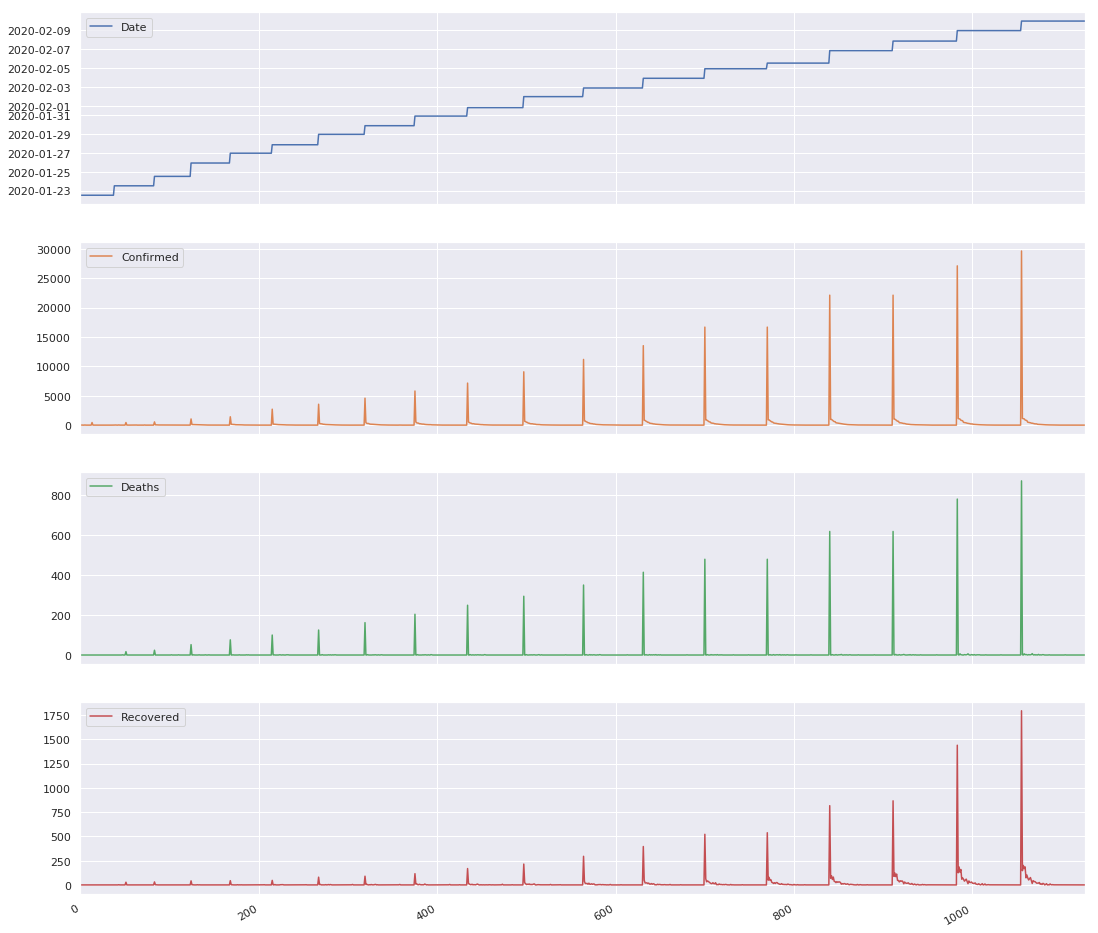

In [27]:
#Plots for the field after data cleaning 
data.plot(subplots=True,figsize=(18,18))
plt.show()

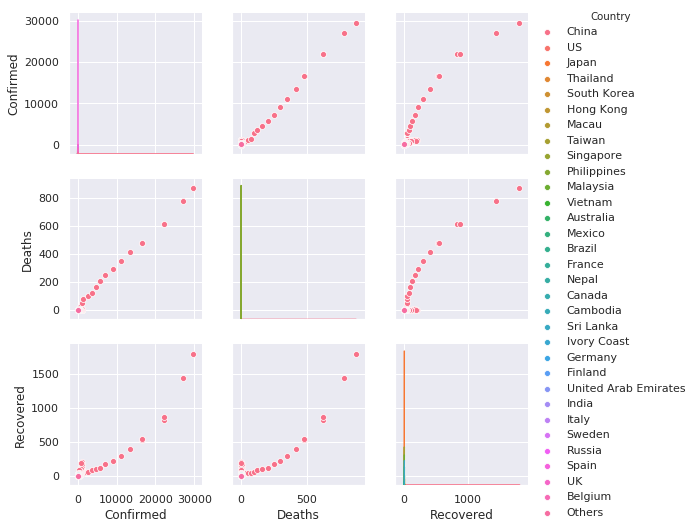

In [28]:
sns.pairplot(data.iloc[:,0:8],hue="Country")
plt.show()

("** Countries, territories or areas with reported confirmed cases, Deaths, Recovered of 2019-nCoV, 31 January 2020**")

In [29]:

from datetime import date
data_2_feb = data[data['Date'] > pd.Timestamp(date(2020,2,2))]
data_2_feb.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
564,2020-02-02 21:00:00,Hubei,China,11177.0,350.0,295.0
565,2020-02-02 21:00:00,Zhejiang,China,724.0,0.0,36.0
566,2020-02-02 21:00:00,Guangdong,China,683.0,0.0,15.0
567,2020-02-02 21:00:00,Henan,China,566.0,2.0,14.0
568,2020-02-02 21:00:00,Hunan,China,521.0,0.0,16.0


In [30]:
import plotly.express as px
pxdf = px.data.gapminder()

country_isoAlpha = pxdf[['country', 'iso_alpha']].drop_duplicates()
country_isoAlpha.rename(columns = {'country':'Country'}, inplace=True)
country_isoAlpha.set_index('Country', inplace=True)
country_map = country_isoAlpha.to_dict('index')

In [31]:
def getCountryIsoAlpha(country):
    try:
        return country_map[country]['iso_alpha']
    except:
        return country
    

In [32]:
data['iso_alpha'] = data['Country'].apply(getCountryIsoAlpha)
data

,Date,Province/State,Country,Confirmed,Deaths,Recovered,iso_alpha
0,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0,CHN
1,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0,CHN
2,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0,CHN
3,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0,CHN
4,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0,CHN
...,...,...,...,...,...,...,...
1122,2020-02-09 23:20:00,"Los Angeles, CA",US,1.0,0.0,0.0,US
1123,2020-02-09 23:20:00,"Madison, WI",US,1.0,0.0,0.0,US
1124,2020-02-09 23:20:00,"Orange, CA",US,1.0,0.0,0.0,US
1125,2020-02-09 23:20:00,"Seattle, WA",US,1.0,0.0,1.0,US


In [33]:
data_plot = data.groupby('iso_alpha').sum().reset_index()
fig = px.choropleth(data_plot, locations="iso_alpha",
                    color="Confirmed", 
                    hover_name="iso_alpha", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [34]:
data.groupby('Country')['Confirmed'].sum()

Country
Australia                  164.0
Belgium                      6.0
Brazil                       0.0
Cambodia                    14.0
Canada                      59.0
China                   285454.0
Finland                     12.0
France                      95.0
Germany                    126.0
Hong Kong                  262.0
India                       26.0
Italy                       25.0
Ivory Coast                  0.0
Japan                      286.0
Macau                      129.0
Malaysia                   145.0
Mexico                       0.0
Nepal                       16.0
Others                     186.0
Philippines                 23.0
Russia                      20.0
Singapore                  306.0
South Korea                218.0
Spain                       11.0
Sri Lanka                   14.0
Sweden                      10.0
Taiwan                     170.0
Thailand                   315.0
UK                          23.0
US                         137.0
Un

In [35]:
data.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[0:10]


Country
China          285454.0
Thailand          315.0
Singapore         306.0
Japan             286.0
Hong Kong         262.0
South Korea       218.0
Others            186.0
Taiwan            170.0
Australia         164.0
Malaysia          145.0
Name: Confirmed, dtype: float64

In [36]:
data.groupby('Country')['Deaths'].sum().sort_values(ascending=False)

Country
China                   6120.0
Philippines                9.0
Hong Kong                  6.0
Vietnam                    0.0
Macau                      0.0
Belgium                    0.0
Brazil                     0.0
Cambodia                   0.0
Canada                     0.0
Finland                    0.0
France                     0.0
Germany                    0.0
India                      0.0
Italy                      0.0
Ivory Coast                0.0
Japan                      0.0
Malaysia                   0.0
United Arab Emirates       0.0
Mexico                     0.0
Nepal                      0.0
Others                     0.0
Russia                     0.0
Singapore                  0.0
South Korea                0.0
Spain                      0.0
Sri Lanka                  0.0
Sweden                     0.0
Taiwan                     0.0
Thailand                   0.0
UK                         0.0
US                         0.0
Australia                  0.0


In [37]:
#Initial Case time
data.sort_values(by='Date')['Date'][0]

Timestamp('2020-01-22 12:00:00')

In [38]:
#latest Case 
data['Date'].max()

Timestamp('2020-02-09 23:20:00')

**Which Countries States were affected the most?**

In [39]:
data[data.Country == 'China'][['Province/State', 'Confirmed']].groupby('Province/State').max()

,Confirmed
Province/State,
Anhui,830.0
Beijing,337.0
Chongqing,468.0
Fujian,261.0
Gansu,83.0
Guangdong,1151.0
Guangxi,210.0
Guizhou,109.0
Hainan,136.0


**Show the no.of Persons affected with Virus**

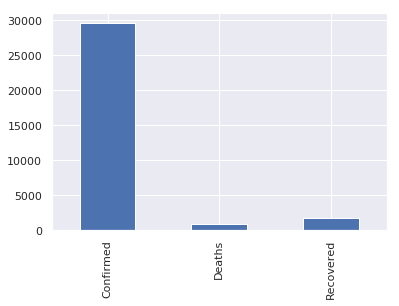

In [40]:
data[['Confirmed', 'Deaths', 'Recovered']].max().plot(kind='bar')

**How many entries are being recorded per Country?**

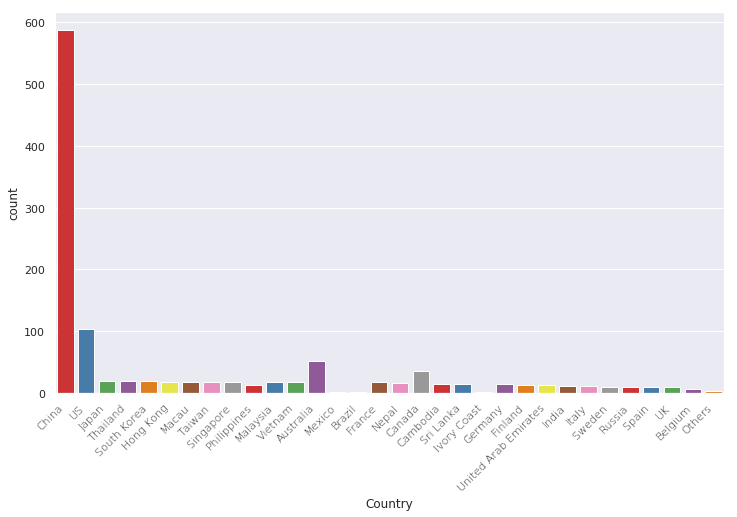

In [41]:
plt.figure(figsize=(12,7))
chart = sns.countplot(data=data, x='Country', palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light');

Contribution from Following Kernels

https://www.kaggle.com/ranjithks/ran-coronavirus-exploratory-data-analysis-eda
<br>https://www.kaggle.com/parulpandey/wuhan-coronavirus-a-geographical-analysis</br>